In [1]:
import copy
import random
import re

import pandas
import numpy

from curve_fits import Call, Spec

from curve_fits import curves
from curve_fits import fits
from curve_fits import frames

In [2]:
def random_ints_sample(size, max_abs=10000):
    return random.sample(range(-max_abs, max_abs), k=size)

In [3]:
size_range = range(1050, 1750)
overfit = 1  # HIGH to differentiate from single-line shape
init_calls = [Call(random_ints_sample(size)) for size in size_range]
profile = frames.TimeComplexityProfile('set', init_calls, {'pop': Call(), 'copy': Call()},
    index=pandas.Index(size_range, name='List length'), overfit=overfit, fraction=0.9, loops=100)

In [4]:
profile.fit_all_with(
    Call(Spec(curves.Polynomial, 2), Spec(curves.Log, 1, pole=10), initial_params=[-1, 1, -1]),
    Call(Spec(curves.Xlog, 1), Spec(curves.InverseXPolynomial, 1)), piecewise=[
    Call([x], *[Call(Spec(curves.Polynomial, 2))]*2) for x in range(1300, 1420)])

In [5]:
profile.best_fits(limit=3)

kind  \
key  cost                                 
pop  0.005990  PW:Poly(1)-[1365]Poly(1)   
     0.006448  PW:Poly(1)-[1367]Poly(1)   
     0.006513  PW:Poly(1)-[1363]Poly(1)   
copy 0.005299  PW:Poly(1)-[1365]Poly(1)   
     0.006712  PW:Poly(1)-[1364]Poly(1)   
     0.006973  PW:Poly(1)-[1366]Poly(1)   

                                                             fit DOF  
key  cost                                                             
pop  0.005990  (-0.01278921180629469) + (5.4625338442832177e-...   4  
     0.006448  (-0.01570852445934014) + (5.717619626484435e-0...   4  
     0.006513  (-0.014194344330804652) + (5.581104475052416e-...   4  
copy 0.005299  (0.006223271252221246) + (6.194807016438566e-0...   4  
     0.006712  (0.006434644089917858) + (6.179835349127466e-0...   4  
     0.006973  (0.0030199269991787697) + (6.479273735002e-05)...   4

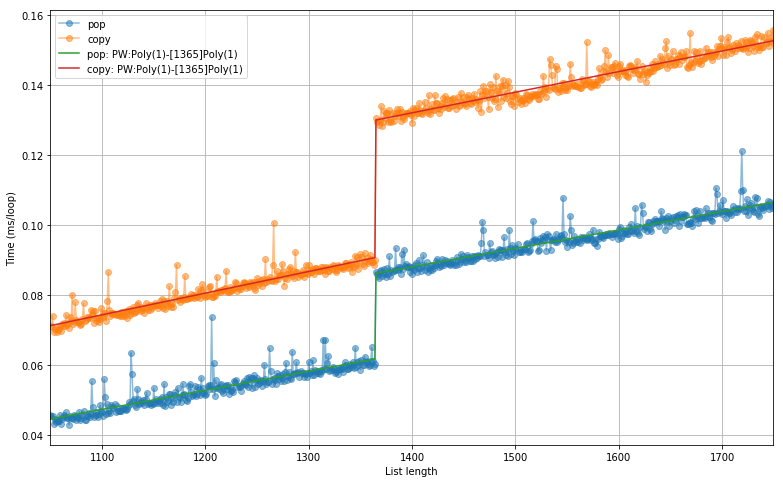

In [6]:
fig, ax = profile.plot(limit=1)

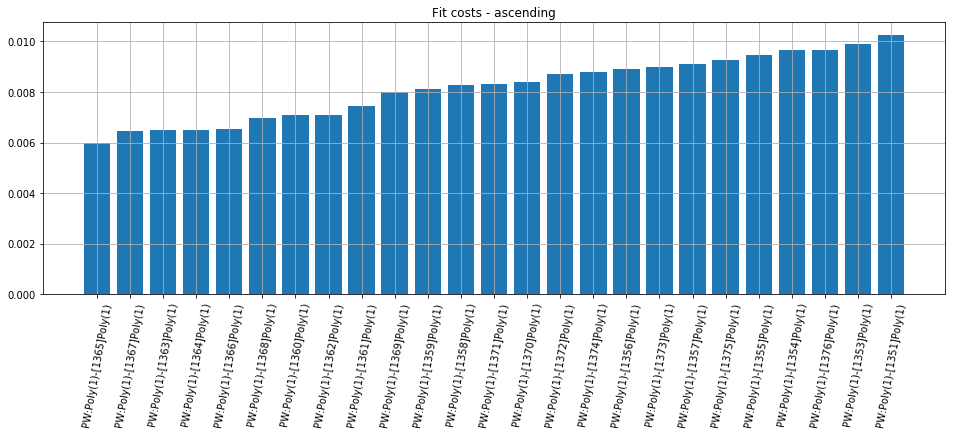

In [7]:
fig, ax = profile.plot_costs('pop', limit=25, rotation=80)

In [8]:
all_fits = profile.best_fits(limit=None)
all_fits[(all_fits.kind == 'Log+Poly(1)') | (all_fits.kind == 'Poly(-1)+Xlog')]

kind  \
key  cost                      
pop  0.017235    Log+Poly(1)   
     0.017788  Poly(-1)+Xlog   
copy 0.026905    Log+Poly(1)   
     0.027347  Poly(-1)+Xlog   

                                                             fit DOF  
key  cost                                                             
pop  0.017235  (-0.8332968860682324) + (1.5069856708331054e-0...   3  
     0.017788  (1.0354106916393595e-05)s*log(s) + (-38.705964...   2  
copy 0.026905  (-1.1459416746644744) + (1.8946757988716526e-0...   3  
     0.027347  (1.4513596733307829e-05)s*log(s) + (-45.362794...   2

In [9]:
pop_fit = profile.best_fit('pop')
pop_fit

<PiecewiseFit: (-0.01278921180629469) + (5.4625338442832177e-05)s | (0.014198158288105932) + (5.277525708964978e-05)s>

In [10]:
pop_fit.fits, pop_fit.jumps_at

((<CurveFit: (-0.01278921180629469) + (5.4625338442832177e-05)s>,
  <CurveFit: (0.014198158288105932) + (5.277525708964978e-05)s>),
 (1365,))

In [11]:
pop_fit.fits[1].measures

(<Measure: 0.0142 ± 0.0016>, <Measure: 0.00005278 ± 9.9E-7>)

In [12]:
pop_fit_copy = copy.deepcopy(pop_fit)
pop_fit_copy.series = None   # Mocked to show equality is not affected
assert pop_fit == copy.deepcopy(pop_fit)

In [13]:
pop_fit_call = Call(pop_fit.jumps_at, *[Call(Spec(curves.Polynomial, 2))]*2)
assert pop_fit != fits.PiecewiseFit(profile.data['pop'], *pop_fit_call.args, **pop_fit_call.kwargs)

In [14]:
assert [re.sub(r'\[[0-9]{3,}\]', '', kind) for kind in profile.best_fits(limit=1)['kind']] == [
    'PW:Poly(1)-Poly(1)', 'PW:Poly(1)-Poly(1)']